### Image rendering w/ tiff images

Experimenting with methods to read and render tiffs for IAM robotics

In [20]:
import base64
import json

#read image and write base64 to json

data = open('board.tif', 'rb').read()
bytes_base64 = base64.b64encode(data)
text_base64 = bytes_base64.decode()


jsonString = json.dumps({'image_base64' : text_base64})
jsonFile = open('imgJson.json', 'w')
jsonFile.write(jsonString)
jsonFile.close()

In [21]:
import os
os.listdir()

['brain_398.tif',
 '.ipynb_checkpoints',
 'jsonImage',
 'Cells.tif',
 'output.tiff',
 'imgJson.json',
 'Untitled.ipynb',
 'exampleTiff.tiff',
 'board.tif',
 'renderTiff.py',
 'out.html']

In [22]:
# read json base64 string

jsonFile = open('imgJson.json', 'r')
jsonString = jsonFile.read()
data = json.loads(jsonString)
len(data)
len(data['image_base64'])

764720

In [23]:
# convert base64 to image
base64_bytes = data['image_base64'].encode()
img_data = base64.b64decode(base64_bytes)
open("output.tiff", "wb").write(img_data)

573538

In [24]:
#render image from local file
#using PIL, no click interface
from PIL import Image
im = Image.open("output.tiff")

im.show()


(eog:309472): Gtk-WARNING **: 13:37:00.605: Theme parsing error: gtk.css:9287:102: The :focused pseudo-class is deprecated. Use :focus instead.

(eog:309472): Gtk-WARNING **: 13:37:00.606: Theme parsing error: gtk.css:9292:114: The :focused pseudo-class is deprecated. Use :focus instead.

(eog:309472): Gtk-WARNING **: 13:37:00.658: Theme parsing error: gtk-dark.css:9287:102: The :focused pseudo-class is deprecated. Use :focus instead.

(eog:309472): Gtk-WARNING **: 13:37:00.658: Theme parsing error: gtk-dark.css:9292:114: The :focused pseudo-class is deprecated. Use :focus instead.


<IPython.core.display.Javascript object>


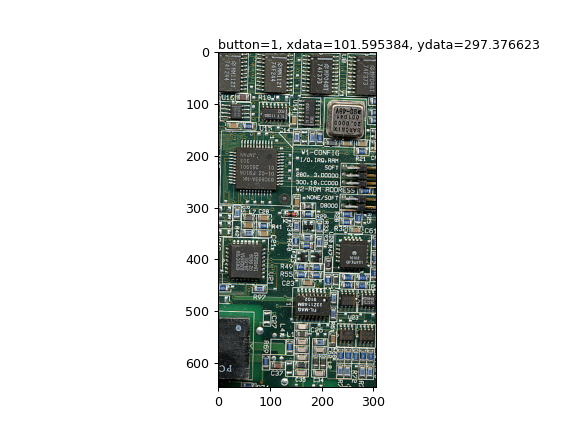

In [40]:
#render image from local file
#uses matplotlib
import matplotlib.pyplot as plt
img = plt.imread('output.tiff')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img)

text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'button=%d, xdata=%f, ydata=%f' % (event.button, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()